In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [47]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [18]:
#URL for the Weather Map API call 
url1 = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
samplecity = "bowling green"
url = f"{url1}appid={weather_api_key}&units={units}&q="
response = requests.get(url+samplecity).json()
response

{'coord': {'lon': -86.44, 'lat': 36.99},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 2,
  'feels_like': -2.8,
  'temp_min': 2,
  'temp_max': 2,
  'pressure': 1024,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 320, 'gust': 7.2},
 'clouds': {'all': 90},
 'dt': 1607973254,
 'sys': {'type': 1,
  'id': 3529,
  'country': 'US',
  'sunrise': 1607950293,
  'sunset': 1607985001},
 'timezone': -21600,
 'id': 4285268,
 'name': 'Bowling Green',
 'cod': 200}

In [24]:

# Create an empty list to store the responses
url = f"{url1}appid={weather_api_key}&units={units}&q="
units = "imperial"

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Call Counter
record = 1

#Print this statement
print(f"Beginning Data Retrieval")
print(f"---------------------------")

# Make a request to loop through the cities
for city in cities:
    try:
        response = requests.get(url+city).json()         
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record: {record} | {city}")
    
        #Keep increasing counter by 1
        record = record + 1

        #if there is no record found, skip to the next
    except:
    
        print(f"City not found")
    
    continue 
    

Beginning Data Retrieval
---------------------------
Processing Record: 1 | bowling green
Processing Record: 2 | puerto ayora
Processing Record: 3 | vaini
Processing Record: 4 | arlit
Processing Record: 5 | moree
Processing Record: 6 | mataura
Processing Record: 7 | cape town
Processing Record: 8 | saint-pierre
Processing Record: 9 | albany
Processing Record: 10 | blagoyevo
Processing Record: 11 | busselton
Processing Record: 12 | korla
City not found
Processing Record: 13 | cayenne
City not found
Processing Record: 14 | ancud
Processing Record: 15 | hay river
Processing Record: 16 | oneonta
Processing Record: 17 | brooks
Processing Record: 18 | cidreira
Processing Record: 19 | sistranda
Processing Record: 20 | poya
City not found
Processing Record: 21 | comacchio
City not found
Processing Record: 22 | los llanos de aridane
Processing Record: 23 | fort nelson
Processing Record: 24 | alacranes
Processing Record: 25 | punta arenas
Processing Record: 26 | tuktoyaktuk
Processing Record: 27

Processing Record: 237 | iraquara
Processing Record: 238 | nenagh
Processing Record: 239 | leningradskiy
Processing Record: 240 | mount isa
Processing Record: 241 | the valley
Processing Record: 242 | ponta do sol
Processing Record: 243 | abu zabad
Processing Record: 244 | geraldton
Processing Record: 245 | matara
Processing Record: 246 | ust-koksa
Processing Record: 247 | bandarbeyla
Processing Record: 248 | ucluelet
City not found
Processing Record: 249 | kingman
Processing Record: 250 | sabang
Processing Record: 251 | aswan
Processing Record: 252 | obidos
Processing Record: 253 | cockburn town
Processing Record: 254 | poum
Processing Record: 255 | saskylakh
Processing Record: 256 | afyonkarahisar
Processing Record: 257 | kavaratti
Processing Record: 258 | mahebourg
Processing Record: 259 | hasaki
Processing Record: 260 | ust-kuyga
Processing Record: 261 | gigmoto
Processing Record: 262 | coihaique
Processing Record: 263 | vestmannaeyjar
Processing Record: 264 | vila franca do campo


Processing Record: 470 | sambava
Processing Record: 471 | langham
Processing Record: 472 | haines junction
Processing Record: 473 | salalah
City not found
Processing Record: 474 | hope
Processing Record: 475 | antibes
Processing Record: 476 | goderich
Processing Record: 477 | wanning
Processing Record: 478 | bayan
Processing Record: 479 | cap malheureux
City not found
City not found
Processing Record: 480 | capitan bado
Processing Record: 481 | pandan
Processing Record: 482 | bouillante
Processing Record: 483 | chadan
Processing Record: 484 | aranda de duero
Processing Record: 485 | riviere-au-renard
Processing Record: 486 | sorong
Processing Record: 487 | lhokseumawe
Processing Record: 488 | lieksa
Processing Record: 489 | khani
Processing Record: 490 | ostuni
Processing Record: 491 | tautira
Processing Record: 492 | liepaja
Processing Record: 493 | helena
Processing Record: 494 | mount gambier
Processing Record: 495 | ramnagar
Processing Record: 496 | samarai
Processing Record: 497 |

In [31]:
weather_dict = {"City":city_name, "Lat":lat,"Lng":lng, "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country,"Date":date}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("output_data.csv")

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bowling Green,36.99,-86.44,2.00,74,90,3.10,US,1607974100
1,Puerto Ayora,-0.74,-90.35,28.00,58,20,8.20,EC,1607974135
2,Vaini,-21.20,-175.20,23.00,100,90,4.60,TO,1607974135
3,Arlit,18.74,7.39,24.29,15,0,2.69,NE,1607974135
4,Moree,-29.47,149.85,20.00,68,40,3.60,AU,1607974135
...,...,...,...,...,...,...,...,...,...
539,Vincennes,48.85,2.43,12.22,81,90,3.60,FR,1607973692
540,Barcelona,41.39,2.16,14.44,93,75,1.50,ES,1607973384
541,Sept-Îles,50.20,-66.38,-1.67,86,92,2.10,CA,1607973482
542,Songjianghe,42.19,127.48,-19.29,80,100,3.79,CN,1607973692


In [32]:
new_weather_data = weather_data.loc[weather_data["Humidity"]>100]
new_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


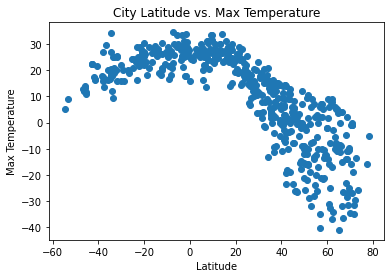

In [36]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"])
            
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig("figure1.png")
            
plt.show()


In [48]:
plt.scatter(weather_data["Lat"], weather_data["Humidity (%)"])
            
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")

plt.savefig("figure2.png")
            
plt.show()

KeyError: 'Humidity (%)'

In [37]:
northern_weather_data = weather_data.loc[weather_data["Lat"]>=0]
northern_weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bowling Green,36.99,-86.44,2.00,74,90,3.10,US,1607974100
3,Arlit,18.74,7.39,24.29,15,0,2.69,NE,1607974135
8,Albany,42.60,-73.97,1.67,81,100,0.75,US,1607973497
9,Blagoyevo,63.37,47.92,-9.94,97,98,1.70,RU,1607973597
11,Korla,41.76,86.15,-7.41,87,6,1.26,CN,1607973598
...,...,...,...,...,...,...,...,...,...
538,Shubarkuduk,49.14,56.49,-9.12,86,100,2.86,KZ,1607973692
539,Vincennes,48.85,2.43,12.22,81,90,3.60,FR,1607973692
540,Barcelona,41.39,2.16,14.44,93,75,1.50,ES,1607973384
541,Sept-Îles,50.20,-66.38,-1.67,86,92,2.10,CA,1607973482


In [41]:
def linearplot(x_values, y_values, y_label, cord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cord,fontsize=15,color="red")
    plt.xlabel('Lat')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 0.6749810145366134


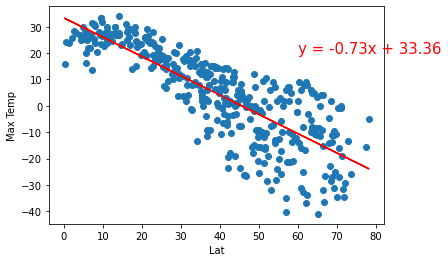

In [46]:
x_values = northern_weather_data["Lat"]
y_values = northern_weather_data["Max Temp"]
y_label = "Max Temp"
cord = (60, 20)
linearplot(x_values, y_values, y_label, cord)